In [1]:
from __future__ import division
import matplotlib
from pylab import *
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress
import numpy as np
import pandas as pd
import math
#import h5py

In [2]:
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go

pio.templates.default = "simple_white"

## import data

In [3]:
folder = "qPCR_211103"
df=pd.read_csv(folder+'/amp.csv',delimiter=',',index_col=1) 

In [4]:
df = df.drop(['Unnamed: 0'], axis=1)

In [6]:
df.index.to_numpy()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40])

## assign label to well

In [16]:
attB = {
    "A1": "1e9 nonlysogen",
    "B1": "1e9 nonlysogen",
    "C1": "1e8 nonlysogen",
    "D1": "1e8 nonlysogen",
    "E1": "1e7 nonlysogen",
    "F1": "1e7 nonlysogen",
    "G1": "1e6 nonlysogen",
    "H1": "1e6 nonlysogen",
    "A2": "1e5 nonlysogen",
    "B2": "1e5 nonlysogen",
    "C2": "ctrl nonlysogen",
    "D2": "ctrl nonlysogen",
    "E2": "ctrl lysogen",
    "F2": "ctrl lysogen",
    "G2": "DEPC water",
    "H2": "DEPC water"
}

In [17]:
attL = {
    "A3": "1e9 lysogen",
    "B3": "1e9 lysogen",
    "C3": "1e8 lysogen",
    "D3": "1e8 lysogen",
    "E3": "1e7 lysogen",
    "F3": "1e7 lysogen",
    "G3": "1e6 lysogen",
    "H3": "1e6 lysogen",
    "A4": "1e5 lysogen",
    "B4": "1e5 lysogen",
    "C4": "ctrl lysogen",
    "D4": "ctrl lysogen",
    "E4": "ctrl nonlysogen",
    "F4": "ctrl nonlysogen",
    "G4": "DEPC water",
    "H4": "DEPC water"
}

In [18]:
cI = {}; 
for i in attL.keys():
    if "3" in i:
        cI[i.replace("3", "5")] = attL[i];
    elif "4" in i:
        cI[i.replace("4", "6")] = attL[i];
cI

{'A5': '1e9 lysogen',
 'B5': '1e9 lysogen',
 'C5': '1e8 lysogen',
 'D5': '1e8 lysogen',
 'E5': '1e7 lysogen',
 'F5': '1e7 lysogen',
 'G5': '1e6 lysogen',
 'H5': '1e6 lysogen',
 'A6': '1e5 lysogen',
 'B6': '1e5 lysogen',
 'C6': 'ctrl lysogen',
 'D6': 'ctrl lysogen',
 'E6': 'ctrl nonlysogen',
 'F6': 'ctrl nonlysogen',
 'G6': 'DEPC water',
 'H6': 'DEPC water'}

In [19]:
bioC = {
    "A7": "1e7 lysogen",
    "B7": "1e7 lysogen",
    "C7": "1e7 nonlysogen",
    "D7": "1e7 nonlysogen",
    "E7": "ctrl lysogen",
    "F7": "ctrl lysogen",
    "G7": "DEPC water",
    "H7": "DEPC water",
}

In [23]:
attP = {
    "A8": "1e7 lysogen",
    "B8": "1e7 lysogen",
    "C8": "1e7 nonlysogen",
    "D8": "1e7 nonlysogen",
    "E8": "ctrl lysate",
    "F8": "ctrl lysate",
    "G8": "DEPC water",
    "H8": "DEPC water",
}

In [24]:
attP

{'A8': '1e7 lysogen',
 'B8': '1e7 lysogen',
 'C8': '1e7 nonlysogen',
 'D8': '1e7 nonlysogen',
 'E8': 'ctrl lysate',
 'F8': 'ctrl lysate',
 'G8': 'DEPC water',
 'H8': 'DEPC water'}

## plot all data

In [26]:
fig = go.Figure()
for i in attB.keys():
    label_ = attB[i]; 
    neg = "ctrl lysogen";
    pos = "ctrl nonlysogen";
    title_ = "attB"; 
    
    if "1e9" in label_:
        symbol = 'circle'; 
    elif "1e8" in label_:
        symbol = 'cross'; 
    elif "1e7" in label_:
        symbol = 'diamond'; 
    elif "1e6" in label_:
        symbol = 'x';
    elif "1e5" in label_:
        symbol = 'square';
    
    if label_ == neg:
        fig.add_trace(go.Scatter(
        x=df.index.to_numpy(),
        y=df[[i]].to_numpy()[:,0],
        mode='lines+markers', # Style name/legend entry with html tags
        name=label_,
        marker_symbol=symbol,
        marker=dict(color='grey', size=4),# override default to connect the gaps
        ))
    elif label_ == pos:
        fig.add_trace(go.Scatter(
        x=df.index.to_numpy(),
        y=df[[i]].to_numpy()[:,0],
        mode='lines+markers', # Style name/legend entry with html tags
        name=label_,
        marker_symbol=symbol,
        marker=dict(color='red', size=4),# override default to connect the gaps
        ))
    elif "DEPC" in label_:
        fig.add_trace(go.Scatter(
        x=df.index.to_numpy(),
        y=df[[i]].to_numpy()[:,0],
        mode='lines+markers', # Style name/legend entry with html tags
        name=label_,
        marker_symbol=symbol,
        marker=dict(color='black', size=4),# override default to connect the gaps
        ))
    else:
        fig.add_trace(go.Scatter(
        x=df.index.to_numpy(),
        y=df[[i]].to_numpy()[:,0],
        mode='lines+markers', # Style name/legend entry with html tags
        name=label_,
        marker_symbol=symbol,
        marker=dict(size=4),# override default to connect the gaps
        ))


fig.update_layout(xaxis_title='Cycle (#)',\
                  yaxis_title='Fluorescence (A.U.)',\
                  updatemenus=[dict(\
                       buttons=[\
                                dict(label="Linear",  method="relayout", args=[{"yaxis.type": "linear"}]),\
                                dict(label="Log", method="relayout", args=[{"yaxis.type": "log"}]),\
                               ])])
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)
fig.update_layout(title_text=title_, title_x=0.5)
fig.layout.font.family = 'Arial'; fig.layout.font.size = 14

fig.show()
fig.write_html(folder+'/01_attB.html')

In [28]:
fig = go.Figure()
for i in attL.keys():
    label_ = attL[i]; 
    pos = "ctrl lysogen";
    neg = "ctrl nonlysogen";
    title_ = "attL"; 
    
    if "1e9" in label_:
        symbol = 'circle'; 
    elif "1e8" in label_:
        symbol = 'cross'; 
    elif "1e7" in label_:
        symbol = 'diamond'; 
    elif "1e6" in label_:
        symbol = 'x';
    elif "1e5" in label_:
        symbol = 'square';
    
    if label_ == neg:
        fig.add_trace(go.Scatter(
        x=df.index.to_numpy(),
        y=df[[i]].to_numpy()[:,0],
        mode='lines+markers', # Style name/legend entry with html tags
        name=label_,
        marker_symbol=symbol,
        marker=dict(color='grey', size=4),# override default to connect the gaps
        ))
    elif label_ == pos:
        fig.add_trace(go.Scatter(
        x=df.index.to_numpy(),
        y=df[[i]].to_numpy()[:,0],
        mode='lines+markers', # Style name/legend entry with html tags
        name=label_,
        marker_symbol=symbol,
        marker=dict(color='red', size=4),# override default to connect the gaps
        ))
    elif "DEPC" in label_:
        fig.add_trace(go.Scatter(
        x=df.index.to_numpy(),
        y=df[[i]].to_numpy()[:,0],
        mode='lines+markers', # Style name/legend entry with html tags
        name=label_,
        marker_symbol=symbol,
        marker=dict(color='black', size=4),# override default to connect the gaps
        ))
    else:
        fig.add_trace(go.Scatter(
        x=df.index.to_numpy(),
        y=df[[i]].to_numpy()[:,0],
        mode='lines+markers', # Style name/legend entry with html tags
        name=label_,
        marker_symbol=symbol,
        marker=dict(size=4),# override default to connect the gaps
        ))


fig.update_layout(xaxis_title='Cycle (#)',\
                  yaxis_title='Fluorescence (A.U.)',\
                  updatemenus=[dict(\
                       buttons=[\
                                dict(label="Linear",  method="relayout", args=[{"yaxis.type": "linear"}]),\
                                dict(label="Log", method="relayout", args=[{"yaxis.type": "log"}]),\
                               ])])
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)
fig.update_layout(title_text=title_, title_x=0.5)
fig.layout.font.family = 'Arial'; fig.layout.font.size = 14

fig.show()
fig.write_html(folder+'/02_attL.html')

In [29]:
fig = go.Figure()
for i in cI.keys():
    label_ = cI[i]; 
    pos = "ctrl lysogen";
    neg = "ctrl nonlysogen";
    title_ = "cI"; 
    
    if "1e9" in label_:
        symbol = 'circle'; 
    elif "1e8" in label_:
        symbol = 'cross'; 
    elif "1e7" in label_:
        symbol = 'diamond'; 
    elif "1e6" in label_:
        symbol = 'x';
    elif "1e5" in label_:
        symbol = 'square';
    
    if label_ == neg:
        fig.add_trace(go.Scatter(
        x=df.index.to_numpy(),
        y=df[[i]].to_numpy()[:,0],
        mode='lines+markers', # Style name/legend entry with html tags
        name=label_,
        marker_symbol=symbol,
        marker=dict(color='grey', size=4),# override default to connect the gaps
        ))
    elif label_ == pos:
        fig.add_trace(go.Scatter(
        x=df.index.to_numpy(),
        y=df[[i]].to_numpy()[:,0],
        mode='lines+markers', # Style name/legend entry with html tags
        name=label_,
        marker_symbol=symbol,
        marker=dict(color='red', size=4),# override default to connect the gaps
        ))
    elif "DEPC" in label_:
        fig.add_trace(go.Scatter(
        x=df.index.to_numpy(),
        y=df[[i]].to_numpy()[:,0],
        mode='lines+markers', # Style name/legend entry with html tags
        name=label_,
        marker_symbol=symbol,
        marker=dict(color='black', size=4),# override default to connect the gaps
        ))
    else:
        fig.add_trace(go.Scatter(
        x=df.index.to_numpy(),
        y=df[[i]].to_numpy()[:,0],
        mode='lines+markers', # Style name/legend entry with html tags
        name=label_,
        marker_symbol=symbol,
        marker=dict(size=4),# override default to connect the gaps
        ))


fig.update_layout(xaxis_title='Cycle (#)',\
                  yaxis_title='Fluorescence (A.U.)',\
                  updatemenus=[dict(\
                       buttons=[\
                                dict(label="Linear",  method="relayout", args=[{"yaxis.type": "linear"}]),\
                                dict(label="Log", method="relayout", args=[{"yaxis.type": "log"}]),\
                               ])])
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)
fig.update_layout(title_text=title_, title_x=0.5)
fig.layout.font.family = 'Arial'; fig.layout.font.size = 14

fig.show()
fig.write_html(folder+'/03_cI.html')

In [30]:
fig = go.Figure()
for i in bioC.keys():
    label_ = bioC[i]; 
    pos = "ctrl lysogen";
    neg = "ctrl nonlysogen";
    title_ = "bioC"; 
    
    if "1e9" in label_:
        symbol = 'circle'; 
    elif "1e8" in label_:
        symbol = 'cross'; 
    elif "1e7" in label_:
        symbol = 'diamond'; 
    elif "1e6" in label_:
        symbol = 'x';
    elif "1e5" in label_:
        symbol = 'square';
    
    if label_ == neg:
        fig.add_trace(go.Scatter(
        x=df.index.to_numpy(),
        y=df[[i]].to_numpy()[:,0],
        mode='lines+markers', # Style name/legend entry with html tags
        name=label_,
        marker_symbol=symbol,
        marker=dict(color='grey', size=4),# override default to connect the gaps
        ))
    elif label_ == pos:
        fig.add_trace(go.Scatter(
        x=df.index.to_numpy(),
        y=df[[i]].to_numpy()[:,0],
        mode='lines+markers', # Style name/legend entry with html tags
        name=label_,
        marker_symbol=symbol,
        marker=dict(color='red', size=4),# override default to connect the gaps
        ))
    elif "DEPC" in label_:
        fig.add_trace(go.Scatter(
        x=df.index.to_numpy(),
        y=df[[i]].to_numpy()[:,0],
        mode='lines+markers', # Style name/legend entry with html tags
        name=label_,
        marker_symbol=symbol,
        marker=dict(color='black', size=4),# override default to connect the gaps
        ))
    else:
        fig.add_trace(go.Scatter(
        x=df.index.to_numpy(),
        y=df[[i]].to_numpy()[:,0],
        mode='lines+markers', # Style name/legend entry with html tags
        name=label_,
        marker_symbol=symbol,
        marker=dict(size=4),# override default to connect the gaps
        ))


fig.update_layout(xaxis_title='Cycle (#)',\
                  yaxis_title='Fluorescence (A.U.)',\
                  updatemenus=[dict(\
                       buttons=[\
                                dict(label="Linear",  method="relayout", args=[{"yaxis.type": "linear"}]),\
                                dict(label="Log", method="relayout", args=[{"yaxis.type": "log"}]),\
                               ])])
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)
fig.update_layout(title_text=title_, title_x=0.5)
fig.layout.font.family = 'Arial'; fig.layout.font.size = 14

fig.show()
fig.write_html(folder+'/04_bioC.html')

In [31]:
fig = go.Figure()
for i in attP.keys():
    label_ = attP[i]; 
    pos = "ctrl lysogen";
    neg = "ctrl nonlysogen";
    title_ = "attP"; 
    
    if "1e9" in label_:
        symbol = 'circle'; 
    elif "1e8" in label_:
        symbol = 'cross'; 
    elif "1e7" in label_:
        symbol = 'diamond'; 
    elif "1e6" in label_:
        symbol = 'x';
    elif "1e5" in label_:
        symbol = 'square';
    
    if label_ == neg:
        fig.add_trace(go.Scatter(
        x=df.index.to_numpy(),
        y=df[[i]].to_numpy()[:,0],
        mode='lines+markers', # Style name/legend entry with html tags
        name=label_,
        marker_symbol=symbol,
        marker=dict(color='grey', size=4),# override default to connect the gaps
        ))
    elif label_ == pos:
        fig.add_trace(go.Scatter(
        x=df.index.to_numpy(),
        y=df[[i]].to_numpy()[:,0],
        mode='lines+markers', # Style name/legend entry with html tags
        name=label_,
        marker_symbol=symbol,
        marker=dict(color='red', size=4),# override default to connect the gaps
        ))
    elif "DEPC" in label_:
        fig.add_trace(go.Scatter(
        x=df.index.to_numpy(),
        y=df[[i]].to_numpy()[:,0],
        mode='lines+markers', # Style name/legend entry with html tags
        name=label_,
        marker_symbol=symbol,
        marker=dict(color='black', size=4),# override default to connect the gaps
        ))
    else:
        fig.add_trace(go.Scatter(
        x=df.index.to_numpy(),
        y=df[[i]].to_numpy()[:,0],
        mode='lines+markers', # Style name/legend entry with html tags
        name=label_,
        marker_symbol=symbol,
        marker=dict(size=4),# override default to connect the gaps
        ))


fig.update_layout(xaxis_title='Cycle (#)',\
                  yaxis_title='Fluorescence (A.U.)',\
                  updatemenus=[dict(\
                       buttons=[\
                                dict(label="Linear",  method="relayout", args=[{"yaxis.type": "linear"}]),\
                                dict(label="Log", method="relayout", args=[{"yaxis.type": "log"}]),\
                               ])])
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)
fig.update_layout(title_text=title_, title_x=0.5)
fig.layout.font.family = 'Arial'; fig.layout.font.size = 14

fig.show()
fig.write_html(folder+'/05_attP.html')

# TECAN method
## base estimate

In [208]:
def get_linear_range(time, data, start_thresh, R_square_thresh, min_points, plot_yes):
#    R_square_thresh = 0.999; 
#    start_thresh = 5; 
#    min_points = 5;
    # skip nan
    start_idx = 0; 
    tmp = np.where(np.isnan(data)==True)[0]
    if len(tmp) > 0:
        start_idx = tmp[-1]
        
    # skip low values
    tmp = np.where(data >= np.log(start_thresh))[0]
    if len(tmp) > 0:
        start_idx = max(start_idx, tmp[0])
        
    # choose starting point
    end_idx = min(start_idx+30, len(data)); 
    starting_idx = np.arange(start_idx,end_idx,1);

    R_square0 = np.array([]);
    for j in starting_idx:
        xdata = time[j:j+min_points];
        ydata = data[j:j+min_points];
        slope, intercept, r_value, _, _ = linregress(xdata, ydata);
        R_square0 = np.append(R_square0, r_value);
    
    if (len(np.where(R_square0>R_square_thresh)[0]) == 0):
        print('fail to find starting points: please lower R_square_thresh');
        return np.array([0,0])
    else:
        j_0 = starting_idx[np.where(R_square0>R_square_thresh)[0][0]];
    
        # choose number of fitting points
        R_square = np.array([]);
        max_points_allowed = len(data)-j_0;
        if max_points_allowed == 0:
            print('fail to find #fitting points: please lower R_square_thresh');
            return np.array([0,0])
        else:
            if max_points_allowed <= min_points: #what about = 0? 
                fitting_points = np.array([max_points_allowed]);
            else:
                fitting_points = np.arange(min_points,min(50,max_points_allowed),1);
            for j in fitting_points:
                xdata = time[j_0:j_0+j];
                ydata = data[j_0:j_0+j];
                slope, intercept, r_value, _, _ = linregress(xdata, ydata);
                R_square = np.append(R_square, r_value);
            tmp2 = np.argmax(R_square);
            j = fitting_points[tmp2]; 
            if plot_yes == True:
                plt.rcParams["figure.figsize"] = (8,7)
                subplot(2,1,1)
                plt.plot(starting_idx, R_square0,'.-');
                plt.axhline(R_square_thresh,color='red');
                plt.axvline(j_0,color='k',alpha = 0.5);
                plt.xlabel('index of fitting start point')
                plt.ylabel('R squared')
                plt.grid(True)
                subplot(2,1,2)
                plt.plot(fitting_points, R_square,'.-');
                plt.axhline(R_square_thresh,color='red');
                plt.axvline(j,color='k',alpha = 0.5);
                plt.xlabel('number of fitting points')
                plt.ylabel('R squared')
                plt.grid(True)
                plt.tight_layout()
            return np.array([j_0, j]);
    

<ipython-input-209-7b272029808a>:2: RuntimeWarning:

invalid value encountered in log



array([22,  5])

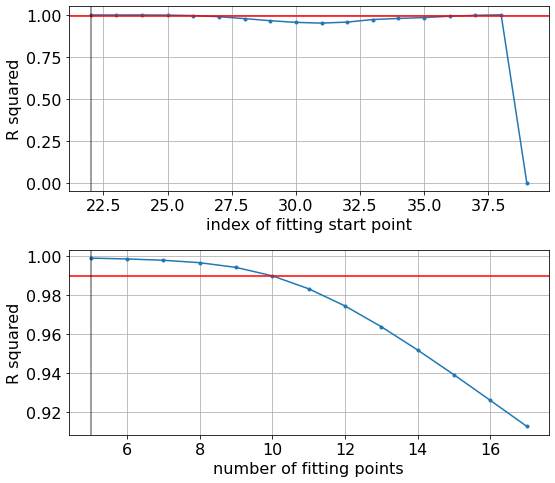

In [209]:
xdata = df.index.to_numpy(); 
ydata = np.log(df[['A8']].to_numpy()[:,0]); 
start_thresh = 30;
R_square_thresh = 0.99; 
min_points = 5;
plot_yes = 1;
get_linear_range(xdata, ydata, start_thresh, R_square_thresh, min_points, plot_yes)

In [210]:
master_base_dict = {}; 
master_x0_dict = {};

In [211]:
base_dict = {}; 
x0_dict = {}; 

fig = go.Figure()
#['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for i in attB.keys():
    label_ = attB[i]; 
    neg = "ctrl lysogen";
    title_ = "attB"; 
    
    if "1e9" in label_:
        symbol = 'circle'; 
        color = '#1f77b4';
    elif "1e8" in label_:
        symbol = 'cross'; 
        color = '#ff7f0e';
    elif "1e7" in label_:
        symbol = 'diamond'; 
        color = '#2ca02c';
    elif "1e6" in label_:
        symbol = 'x';
        color = '#d62728';
    elif "1e5" in label_:
        symbol = 'square';
        color = '#9467bd';
    elif label_ == "ctrl lysogen":
        color = '#8c564b';
    elif label_ == "ctrl nonlysogen":
        color = '#e377c2';
    elif "DEPC" in label_:
        color = 'black'; 

    if label_ == neg:
        color = "grey"; 
    
    x = df.index.to_numpy();
    y=df[[i]].to_numpy()[:,0];
    xdata = df.index.to_numpy();
    ydata = np.log(df[[i]].to_numpy()[:,0]);
    
    if max(y)<100:
        fig.add_trace(go.Scatter(
        x=x,
        y=y,
        mode='markers', # Style name/legend entry with html tags
        name=label_,
        marker_symbol=symbol,
        marker=dict(color=color, size=4),# override default to connect the gaps
        ))
        
    else:
        array_tmp = get_linear_range(xdata, ydata, 40, 0.99, 5, 0);
        j_0 = array_tmp[0];
        j = array_tmp[1];
        xdata_ = xdata[j_0:j_0+j];
        ydata_ = ydata[j_0:j_0+j]; 
        slope, intercept, r_value, _, stderr = linregress(xdata_, ydata_);
        slope_ = str(np.exp(slope))[:4]; 
        
        base_dict[label_+" "+i] = np.exp(slope); 
        x0_dict[label_+" "+i] = np.exp(intercept); 
        
        fig.add_trace(go.Scatter(
        x=x,
        y=y,
        mode='markers', # Style name/legend entry with html tags
        name=label_,
        marker_symbol=symbol,
        marker=dict(color=color, size=4),# override default to connect the gaps
        ))
        
        fig.add_trace(go.Scatter(
            x=xdata,
            y=np.exp(slope*xdata+intercept),
            mode='lines', 
            name='base='+slope_,
            line=dict(color=color, width=1),
        ))
    

fig.update_layout(xaxis_title='Cycle (#)',\
                  yaxis_title='Fluorescence (A.U.)',\
                  updatemenus=[dict(\
                       buttons=[\
                                dict(label="Linear",  method="relayout", args=[{"yaxis.type": "linear"}]),\
                                dict(label="Log", method="relayout", args=[{"yaxis.type": "log"}]),\
                               ])])
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)
fig.update_layout(title_text=title_, title_x=0.5)
fig.layout.font.family = 'Arial'; fig.layout.font.size = 14

fig.show()
fig.write_html(folder+'/06_fit_attB.html')

<ipython-input-211-2f0893207b08>:39: RuntimeWarning:

invalid value encountered in log

/Users/turtle/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning:

invalid value encountered in double_scalars

/Users/turtle/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:140: RuntimeWarning:

invalid value encountered in sqrt

/Users/turtle/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning:

invalid value encountered in double_scalars



/Users/turtle/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning:

Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.



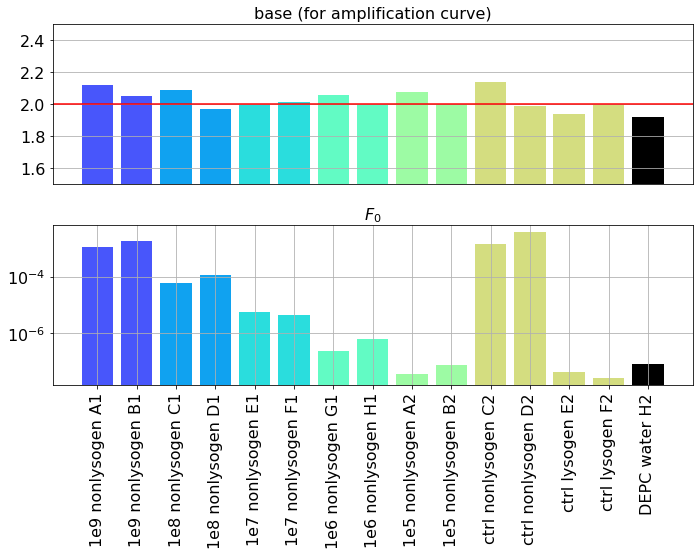

In [212]:
color = cm.rainbow(np.linspace(0, 1, 10))

fontSize=16
#matplotlib.rcParams.update({"axes.formatter.limits": (-4,4), "svg.fonttype" : "none", 'font.family':'MathJax_SansSerif', 'font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,'text.usetex':False,'text.latex.preamble':[r'\usepackage{sansmath}',r'\sansmath']})
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4), "svg.fonttype" : "none", 'pdf.fonttype':42,'font.family':'DejaVu Sans','font.sans-serif':'Helvetica','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,'text.usetex':False,'text.latex.preamble':[r'\usepackage{sansmath}',r'\sansmath']})
plotStyles={"markersize":8,"markeredgewidth":1.0,"linewidth":3.0}
stepStyles={"markersize":20,"markeredgewidth":3.0,"linewidth":3.0,"where":"post"}
barStyles={"width":0.65, "linewidth":0, "align":"center"}

plt.rcParams["figure.figsize"] = (10,8)

subplot(2,1,1)
k = 1; 
j = 0; name_arr = []; 
for i in base_dict.keys():
    tmp = i.split(" ")[0]; 
    if tmp in name_arr:
        j = j;
    else:
        name_arr.append(tmp);
        j = j+1;
    if "DEPC" in i:
        plt.bar(k,base_dict[i], color="black")
    else:
        plt.bar(k,base_dict[i], color=color[j])
    k = k+1;

plt.axhline(2,color='red')
plt.ylim((1.5,2.5))
#plt.legend(fontsize=12,ncol=6,framealpha=1)
plt.xticks([])
#plt.ylabel('base')
plt.grid(True)
plt.title('base (for amplification curve)')

subplot(2,1,2)
k = 1; 
j = 0; name_arr = []; 
for i in ct_dict.keys():
    tmp = i.split(" ")[0]; 
    if tmp in name_arr:
        j = j;
    else:
        name_arr.append(tmp);
        j = j+1;
    x0 = x0_dict[i]; 
    if "DEPC" in i:
        plt.bar(k,x0, color="black")
    else:
        plt.bar(k,x0, color=color[j])
    k = k+1;

#plt.axhline(2,color='black')
#plt.ylim((1.5,2.5))
#plt.legend(fontsize=12,ncol=6,framealpha=1)
plt.xticks(range(1,16),base_dict.keys(),rotation = 90 ); 
plt.yscale('log')
#plt.ylabel('base')
plt.grid(True)
plt.title(r'$F_0$')

plt.tight_layout()

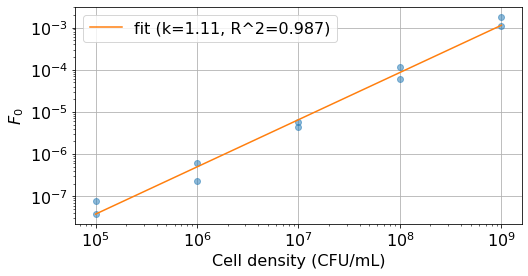

In [213]:
plt.rcParams["figure.figsize"] = (8,4)

x_ = np.array([]);
y_ = np.array([]); 
for i in ['1e9','1e8','1e7','1e6','1e5']:
    for j in list(x0_dict.keys()):
        if i in j:
            x_ = np.append(x_, float(i));
            y_ = np.append(y_, x0_dict[j]); 

            
slope, intercept, r_value, _, _ = linregress(np.log(x_), np.log(y_));    
plt.plot(x_,y_,'o',alpha=0.5)
plt.plot(x_, np.exp(intercept+slope*(np.log(x_))), label='fit (k='+str(slope)[:4]+', R^2='+str(r_value**2)[:5]+')')
plt.xlabel('Cell density (CFU/mL)')
plt.ylabel('$F_0$')
plt.legend()
plt.xscale('log'); plt.yscale('log')
plt.grid(True)

In [214]:
master_base_dict["attB"] = base_dict;  
master_x0_dict["attB"] = x0_dict;

In [215]:
base_dict = {}; 
x0_dict = {}; 

fig = go.Figure()
#['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for i in attL.keys():
    label_ = attL[i]; 
    neg = "ctrl nonlysogen";
    title_ = "attL"; 
    
    if "1e9" in label_:
        symbol = 'circle'; 
        color = '#1f77b4';
    elif "1e8" in label_:
        symbol = 'cross'; 
        color = '#ff7f0e';
    elif "1e7" in label_:
        symbol = 'diamond'; 
        color = '#2ca02c';
    elif "1e6" in label_:
        symbol = 'x';
        color = '#d62728';
    elif "1e5" in label_:
        symbol = 'square';
        color = '#9467bd';
    elif label_ == "ctrl lysogen":
        color = '#8c564b';
    elif label_ == "ctrl nonlysogen":
        color = '#e377c2';
    elif "DEPC" in label_:
        color = 'black'; 

    if label_ == neg:
        color = "grey"; 
    
    x = df.index.to_numpy();
    y=df[[i]].to_numpy()[:,0];
    xdata = df.index.to_numpy();
    ydata = np.log(df[[i]].to_numpy()[:,0]);
    
    if max(y)<100:
        fig.add_trace(go.Scatter(
        x=x,
        y=y,
        mode='markers', # Style name/legend entry with html tags
        name=label_,
        marker_symbol=symbol,
        marker=dict(color=color, size=4),# override default to connect the gaps
        ))
        
    else:
        array_tmp = get_linear_range(xdata, ydata, 40, 0.99, 5, 0);
        j_0 = array_tmp[0];
        j = array_tmp[1];
        xdata_ = xdata[j_0:j_0+j];
        ydata_ = ydata[j_0:j_0+j]; 
        slope, intercept, r_value, _, stderr = linregress(xdata_, ydata_);
        slope_ = str(np.exp(slope))[:4]; 
        
        base_dict[label_+" "+i] = np.exp(slope); 
        x0_dict[label_+" "+i] = np.exp(intercept); 
        
        fig.add_trace(go.Scatter(
        x=x,
        y=y,
        mode='markers', # Style name/legend entry with html tags
        name=label_,
        marker_symbol=symbol,
        marker=dict(color=color, size=4),# override default to connect the gaps
        ))
        
        fig.add_trace(go.Scatter(
            x=xdata,
            y=np.exp(slope*xdata+intercept),
            mode='lines', 
            name='base='+slope_,
            line=dict(color=color, width=1),
        ))
    

fig.update_layout(xaxis_title='Cycle (#)',\
                  yaxis_title='Fluorescence (A.U.)',\
                  updatemenus=[dict(\
                       buttons=[\
                                dict(label="Linear",  method="relayout", args=[{"yaxis.type": "linear"}]),\
                                dict(label="Log", method="relayout", args=[{"yaxis.type": "log"}]),\
                               ])])
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)
fig.update_layout(title_text=title_, title_x=0.5)
fig.layout.font.family = 'Arial'; fig.layout.font.size = 14

fig.show()
fig.write_html(folder+'/07_fit_attL.html')

<ipython-input-215-9663e65f96e1>:39: RuntimeWarning:

invalid value encountered in log

/Users/turtle/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning:

invalid value encountered in double_scalars

/Users/turtle/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:140: RuntimeWarning:

invalid value encountered in sqrt

/Users/turtle/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning:

invalid value encountered in double_scalars



/Users/turtle/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning:

Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.



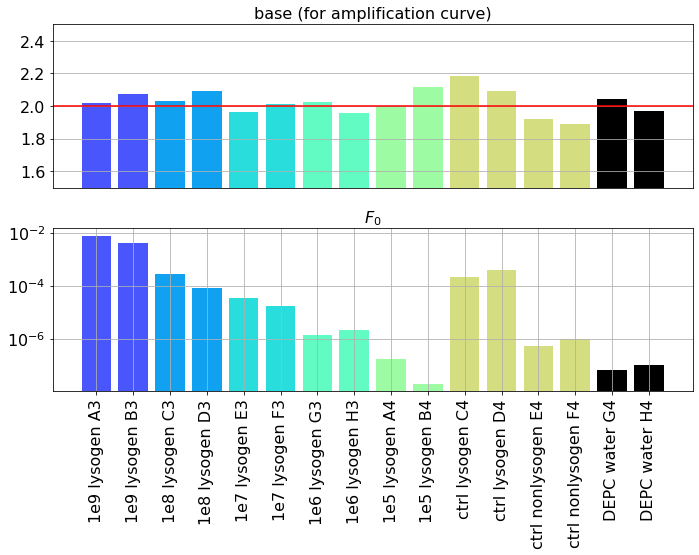

In [216]:
color = cm.rainbow(np.linspace(0, 1, 10))

fontSize=16
#matplotlib.rcParams.update({"axes.formatter.limits": (-4,4), "svg.fonttype" : "none", 'font.family':'MathJax_SansSerif', 'font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,'text.usetex':False,'text.latex.preamble':[r'\usepackage{sansmath}',r'\sansmath']})
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4), "svg.fonttype" : "none", 'pdf.fonttype':42,'font.family':'DejaVu Sans','font.sans-serif':'Helvetica','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,'text.usetex':False,'text.latex.preamble':[r'\usepackage{sansmath}',r'\sansmath']})
plotStyles={"markersize":8,"markeredgewidth":1.0,"linewidth":3.0}
stepStyles={"markersize":20,"markeredgewidth":3.0,"linewidth":3.0,"where":"post"}
barStyles={"width":0.65, "linewidth":0, "align":"center"}

plt.rcParams["figure.figsize"] = (10,8)

subplot(2,1,1)
k = 1; 
j = 0; name_arr = []; 
for i in base_dict.keys():
    tmp = i.split(" ")[0]; 
    if tmp in name_arr:
        j = j;
    else:
        name_arr.append(tmp);
        j = j+1;
    if "DEPC" in i:
        plt.bar(k,base_dict[i], color="black")
    else:
        plt.bar(k,base_dict[i], color=color[j])
    k = k+1;

plt.axhline(2,color='red')
plt.ylim((1.5,2.5))
#plt.legend(fontsize=12,ncol=6,framealpha=1)
plt.xticks([])
#plt.ylabel('base')
plt.grid(True)
plt.title('base (for amplification curve)')

subplot(2,1,2)
k = 1; 
j = 0; name_arr = []; 
for i in x0_dict.keys():
    tmp = i.split(" ")[0]; 
    if tmp in name_arr:
        j = j;
    else:
        name_arr.append(tmp);
        j = j+1;
    x0 = x0_dict[i]; 
    if "DEPC" in i:
        plt.bar(k,x0, color="black")
    else:
        plt.bar(k,x0, color=color[j])
    k = k+1;

plt.xticks(range(1,17),base_dict.keys(),rotation = 90 ); 
plt.yscale('log')
#plt.ylabel('base')
plt.grid(True)
plt.title(r'$F_0$')

plt.tight_layout()

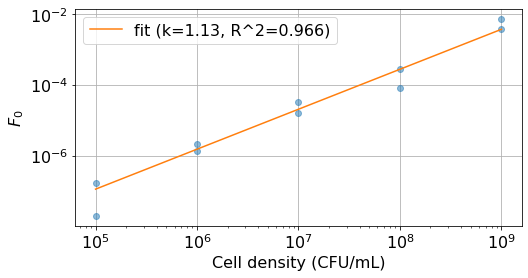

In [217]:
plt.rcParams["figure.figsize"] = (8,4)

x_ = np.array([]);
y_ = np.array([]); 
for i in ['1e9','1e8','1e7','1e6','1e5']:
    for j in list(x0_dict.keys()):
        if i in j:
            x_ = np.append(x_, float(i));
            y_ = np.append(y_, x0_dict[j]); 

            
slope, intercept, r_value, _, _ = linregress(np.log(x_[:-2]), np.log(y_[:-2]));    
plt.plot(x_,y_,'o',alpha=0.5)
plt.plot(x_, np.exp(intercept+slope*(np.log(x_))), label='fit (k='+str(slope)[:4]+', R^2='+str(r_value**2)[:5]+')')
plt.xlabel('Cell density (CFU/mL)')
plt.ylabel('$F_0$')
plt.legend()
plt.xscale('log'); plt.yscale('log')
plt.grid(True)

In [218]:
master_base_dict["attL"] = base_dict;  
master_x0_dict["attL"] = x0_dict;

In [219]:
base_dict = {}; 
x0_dict = {}; 

fig = go.Figure()
#['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for i in cI.keys():
    label_ = cI[i]; 
    neg = "ctrl nonlysogen";
    title_ = "cI"; 
    
    if "1e9" in label_:
        symbol = 'circle'; 
        color = '#1f77b4';
    elif "1e8" in label_:
        symbol = 'cross'; 
        color = '#ff7f0e';
    elif "1e7" in label_:
        symbol = 'diamond'; 
        color = '#2ca02c';
    elif "1e6" in label_:
        symbol = 'x';
        color = '#d62728';
    elif "1e5" in label_:
        symbol = 'square';
        color = '#9467bd';
    elif label_ == "ctrl lysogen":
        color = '#8c564b';
    elif label_ == "ctrl nonlysogen":
        color = '#e377c2';
    elif "DEPC" in label_:
        color = 'black'; 

    if label_ == neg:
        color = "grey"; 
    
    x = df.index.to_numpy();
    y=df[[i]].to_numpy()[:,0];
    xdata = df.index.to_numpy();
    ydata = np.log(df[[i]].to_numpy()[:,0]);
    
    if max(y)<100:
        fig.add_trace(go.Scatter(
        x=x,
        y=y,
        mode='markers', # Style name/legend entry with html tags
        name=label_,
        marker_symbol=symbol,
        marker=dict(color=color, size=4),# override default to connect the gaps
        ))
        
    else:
        array_tmp = get_linear_range(xdata, ydata, 40, 0.99, 5, 0);
        j_0 = array_tmp[0];
        j = array_tmp[1];
        xdata_ = xdata[j_0:j_0+j];
        ydata_ = ydata[j_0:j_0+j]; 
        slope, intercept, r_value, _, stderr = linregress(xdata_, ydata_);
        slope_ = str(np.exp(slope))[:4]; 
        
        base_dict[label_+" "+i] = np.exp(slope); 
        x0_dict[label_+" "+i] = np.exp(intercept); 
        
        fig.add_trace(go.Scatter(
        x=x,
        y=y,
        mode='markers', # Style name/legend entry with html tags
        name=label_,
        marker_symbol=symbol,
        marker=dict(color=color, size=4),# override default to connect the gaps
        ))
        
        fig.add_trace(go.Scatter(
            x=xdata,
            y=np.exp(slope*xdata+intercept),
            mode='lines', 
            name='base='+slope_,
            line=dict(color=color, width=1),
        ))
    

fig.update_layout(xaxis_title='Cycle (#)',\
                  yaxis_title='Fluorescence (A.U.)',\
                  updatemenus=[dict(\
                       buttons=[\
                                dict(label="Linear",  method="relayout", args=[{"yaxis.type": "linear"}]),\
                                dict(label="Log", method="relayout", args=[{"yaxis.type": "log"}]),\
                               ])])
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)
fig.update_layout(title_text=title_, title_x=0.5)
fig.layout.font.family = 'Arial'; fig.layout.font.size = 14

fig.show()
fig.write_html(folder+'/08_fit_cI.html')

<ipython-input-219-d09aa6ba3ccf>:39: RuntimeWarning:

invalid value encountered in log

/Users/turtle/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning:

invalid value encountered in double_scalars

/Users/turtle/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:140: RuntimeWarning:

invalid value encountered in sqrt

/Users/turtle/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning:

invalid value encountered in double_scalars



/Users/turtle/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning:

Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.



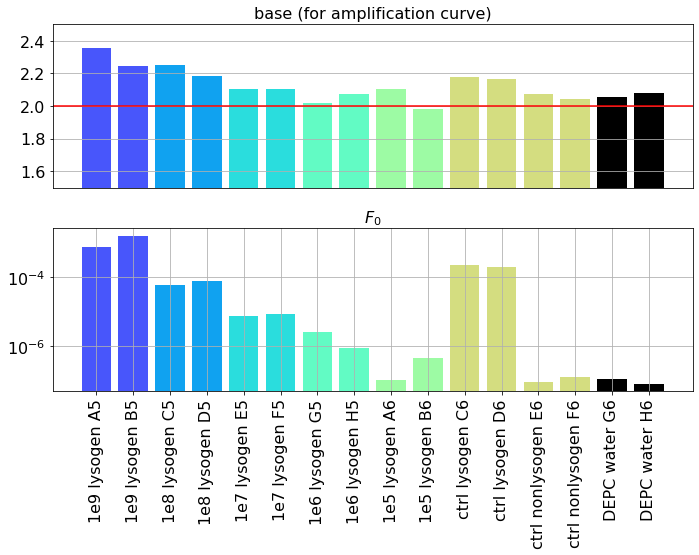

In [220]:
color = cm.rainbow(np.linspace(0, 1, 10))

fontSize=16
#matplotlib.rcParams.update({"axes.formatter.limits": (-4,4), "svg.fonttype" : "none", 'font.family':'MathJax_SansSerif', 'font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,'text.usetex':False,'text.latex.preamble':[r'\usepackage{sansmath}',r'\sansmath']})
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4), "svg.fonttype" : "none", 'pdf.fonttype':42,'font.family':'DejaVu Sans','font.sans-serif':'Helvetica','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,'text.usetex':False,'text.latex.preamble':[r'\usepackage{sansmath}',r'\sansmath']})
plotStyles={"markersize":8,"markeredgewidth":1.0,"linewidth":3.0}
stepStyles={"markersize":20,"markeredgewidth":3.0,"linewidth":3.0,"where":"post"}
barStyles={"width":0.65, "linewidth":0, "align":"center"}

plt.rcParams["figure.figsize"] = (10,8)

subplot(2,1,1)
k = 1; 
j = 0; name_arr = []; 
for i in base_dict.keys():
    tmp = i.split(" ")[0]; 
    if tmp in name_arr:
        j = j;
    else:
        name_arr.append(tmp);
        j = j+1;
    if "DEPC" in i:
        plt.bar(k,base_dict[i], color="black")
    else:
        plt.bar(k,base_dict[i], color=color[j])
    k = k+1;

plt.axhline(2,color='red')
plt.ylim((1.5,2.5))
#plt.legend(fontsize=12,ncol=6,framealpha=1)
plt.xticks([])
#plt.ylabel('base')
plt.grid(True)
plt.title('base (for amplification curve)')

subplot(2,1,2)
k = 1; 
j = 0; name_arr = []; 
for i in x0_dict.keys():
    tmp = i.split(" ")[0]; 
    if tmp in name_arr:
        j = j;
    else:
        name_arr.append(tmp);
        j = j+1;
    x0 = x0_dict[i]; 
    if "DEPC" in i:
        plt.bar(k,x0, color="black")
    else:
        plt.bar(k,x0, color=color[j])
    k = k+1;

plt.xticks(range(1,17),base_dict.keys(),rotation = 90 ); 
plt.yscale('log')
#plt.ylabel('base')
plt.grid(True)
plt.title(r'$F_0$')

plt.tight_layout()

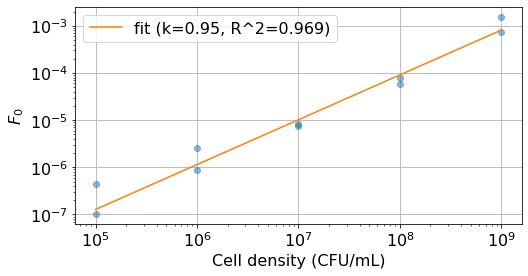

In [221]:
plt.rcParams["figure.figsize"] = (8,4)

x_ = np.array([]);
y_ = np.array([]); 
for i in ['1e9','1e8','1e7','1e6','1e5']:
    for j in list(x0_dict.keys()):
        if i in j:
            x_ = np.append(x_, float(i));
            y_ = np.append(y_, x0_dict[j]); 

            
slope, intercept, r_value, _, _ = linregress(np.log(x_[:-2]), np.log(y_[:-2]));    
plt.plot(x_,y_,'o',alpha=0.5)
plt.plot(x_, np.exp(intercept+slope*(np.log(x_))), label='fit (k='+str(slope)[:4]+', R^2='+str(r_value**2)[:5]+')')
plt.xlabel('Cell density (CFU/mL)')
plt.ylabel('$F_0$')
plt.legend()
plt.xscale('log'); plt.yscale('log')
plt.grid(True)

In [222]:
master_base_dict["cI"] = base_dict;  
master_x0_dict["cI"] = x0_dict;

In [223]:
base_dict = {}; 
x0_dict = {}; 

fig = go.Figure()
#['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for i in bioC.keys():
    label_ = bioC[i]; 
    title_ = "bioC"; 
    
    if "1e7 nonlysogen" in label_:
        symbol = 'circle'; 
        color = '#1f77b4';
    elif "1e7 lysogen" in label_:
        symbol = 'diamond'; 
        color = '#2ca02c';
    elif label_ == "ctrl lysogen":
        color = '#8c564b';
    elif label_ == "ctrl nonlysogen":
        color = '#e377c2';
    elif "DEPC" in label_:
        color = 'black'; 

    
    x = df.index.to_numpy();
    y=df[[i]].to_numpy()[:,0];
    xdata = df.index.to_numpy();
    ydata = np.log(df[[i]].to_numpy()[:,0]);
    
    if max(y)<100:
        fig.add_trace(go.Scatter(
        x=x,
        y=y,
        mode='markers', # Style name/legend entry with html tags
        name=label_,
        marker_symbol=symbol,
        marker=dict(color=color, size=4),# override default to connect the gaps
        ))
        
    else:
        array_tmp = get_linear_range(xdata, ydata, 40, 0.99, 5, 0);
        j_0 = array_tmp[0];
        j = array_tmp[1];
        xdata_ = xdata[j_0:j_0+j];
        ydata_ = ydata[j_0:j_0+j]; 
        slope, intercept, r_value, _, stderr = linregress(xdata_, ydata_);
        slope_ = str(np.exp(slope))[:4]; 
        
        base_dict[label_+" "+i] = np.exp(slope); 
        x0_dict[label_+" "+i] = np.exp(intercept);  
        
        fig.add_trace(go.Scatter(
        x=x,
        y=y,
        mode='markers', # Style name/legend entry with html tags
        name=label_,
        marker_symbol=symbol,
        marker=dict(color=color, size=4),# override default to connect the gaps
        ))
        
        fig.add_trace(go.Scatter(
            x=xdata,
            y=np.exp(slope*xdata+intercept),
            mode='lines', 
            name='base='+slope_,
            line=dict(color=color, width=1),
        ))
    

fig.update_layout(xaxis_title='Cycle (#)',\
                  yaxis_title='Fluorescence (A.U.)',\
                  updatemenus=[dict(\
                       buttons=[\
                                dict(label="Linear",  method="relayout", args=[{"yaxis.type": "linear"}]),\
                                dict(label="Log", method="relayout", args=[{"yaxis.type": "log"}]),\
                               ])])
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)
fig.update_layout(title_text=title_, title_x=0.5)
fig.layout.font.family = 'Arial'; fig.layout.font.size = 14

fig.show()
fig.write_html(folder+'/09_fit_bioC.html')

<ipython-input-223-140e3da86919>:27: RuntimeWarning:

invalid value encountered in log

/Users/turtle/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning:

invalid value encountered in double_scalars

/Users/turtle/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:140: RuntimeWarning:

invalid value encountered in sqrt

/Users/turtle/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning:

invalid value encountered in double_scalars



/Users/turtle/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning:

Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.



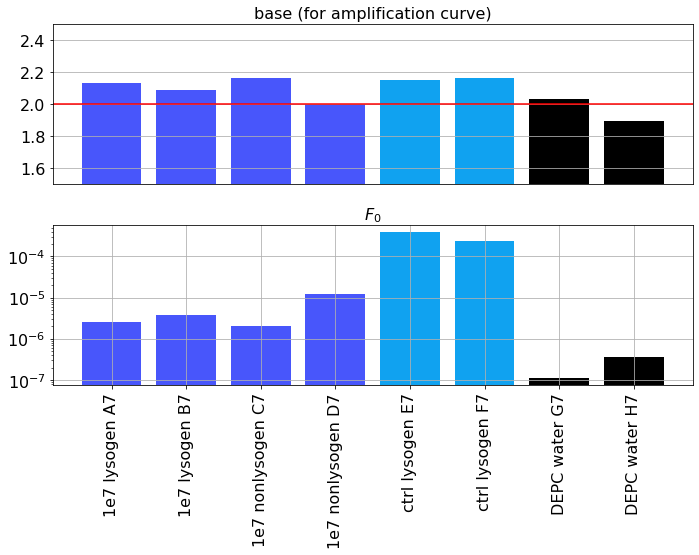

In [224]:
color = cm.rainbow(np.linspace(0, 1, 10))

fontSize=16
#matplotlib.rcParams.update({"axes.formatter.limits": (-4,4), "svg.fonttype" : "none", 'font.family':'MathJax_SansSerif', 'font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,'text.usetex':False,'text.latex.preamble':[r'\usepackage{sansmath}',r'\sansmath']})
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4), "svg.fonttype" : "none", 'pdf.fonttype':42,'font.family':'DejaVu Sans','font.sans-serif':'Helvetica','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,'text.usetex':False,'text.latex.preamble':[r'\usepackage{sansmath}',r'\sansmath']})
plotStyles={"markersize":8,"markeredgewidth":1.0,"linewidth":3.0}
stepStyles={"markersize":20,"markeredgewidth":3.0,"linewidth":3.0,"where":"post"}
barStyles={"width":0.65, "linewidth":0, "align":"center"}

plt.rcParams["figure.figsize"] = (10,8)

subplot(2,1,1)
k = 1; 
j = 0; name_arr = []; 
for i in base_dict.keys():
    tmp = i.split(" ")[0]; 
    if tmp in name_arr:
        j = j;
    else:
        name_arr.append(tmp);
        j = j+1;
    if "DEPC" in i:
        plt.bar(k,base_dict[i], color="black")
    else:
        plt.bar(k,base_dict[i], color=color[j])
    k = k+1;

plt.axhline(2,color='red')
plt.ylim((1.5,2.5))
#plt.legend(fontsize=12,ncol=6,framealpha=1)
plt.xticks([])
#plt.ylabel('base')
plt.grid(True)
plt.title('base (for amplification curve)')

subplot(2,1,2)
k = 1; 
j = 0; name_arr = []; 
for i in x0_dict.keys():
    tmp = i.split(" ")[0]; 
    if tmp in name_arr:
        j = j;
    else:
        name_arr.append(tmp);
        j = j+1;
    x0 = x0_dict[i]; 
    if "DEPC" in i:
        plt.bar(k,x0, color="black")
    else:
        plt.bar(k,x0, color=color[j])
    k = k+1;

plt.xticks(range(1,9),base_dict.keys(),rotation = 90 ); 
plt.yscale('log')
#plt.ylabel('base')
plt.grid(True)
plt.title(r'$F_0$')

plt.tight_layout()

In [225]:
master_base_dict["bioC"] = base_dict;  
master_x0_dict["bioC"] = x0_dict;

In [226]:
base_dict = {}; 
x0_dict = {}; 

fig = go.Figure()
#['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for i in attP.keys():
    label_ = attP[i]; 
    title_ = "attP"; 
    
    if "1e7 nonlysogen" in label_:
        symbol = 'circle'; 
        color = '#1f77b4';
    elif "1e7 lysogen" in label_:
        symbol = 'diamond'; 
        color = '#2ca02c';
    elif label_ == "ctrl lysate":
        color = '#8c564b';
    elif label_ == "ctrl nonlysogen":
        color = '#e377c2';
    elif "DEPC" in label_:
        color = 'black'; 

    
    x = df.index.to_numpy();
    y=df[[i]].to_numpy()[:,0];
    xdata = df.index.to_numpy();
    ydata = np.log(df[[i]].to_numpy()[:,0]);
    
    if max(y)<100:
        fig.add_trace(go.Scatter(
        x=x,
        y=y,
        mode='markers', # Style name/legend entry with html tags
        name=label_,
        marker_symbol=symbol,
        marker=dict(color=color, size=4),# override default to connect the gaps
        ))
        
    else:
        array_tmp = get_linear_range(xdata, ydata, 30, 0.99, 5, 0);
        j_0 = array_tmp[0];
        j = array_tmp[1];
        xdata_ = xdata[j_0:j_0+j];
        ydata_ = ydata[j_0:j_0+j]; 
        slope, intercept, r_value, _, stderr = linregress(xdata_, ydata_);
        slope_ = str(np.exp(slope))[:4]; 
        
        base_dict[label_+" "+i] = np.exp(slope); 
        x0_dict[label_+" "+i] = np.exp(intercept);
        
        fig.add_trace(go.Scatter(
        x=x,
        y=y,
        mode='markers', # Style name/legend entry with html tags
        name=label_,
        marker_symbol=symbol,
        marker=dict(color=color, size=4),# override default to connect the gaps
        ))
        
        fig.add_trace(go.Scatter(
            x=xdata,
            y=np.exp(slope*xdata+intercept),
            mode='lines', 
            name='base='+slope_,
            line=dict(color=color, width=1),
        ))
    

fig.update_layout(xaxis_title='Cycle (#)',\
                  yaxis_title='Fluorescence (A.U.)',\
                  updatemenus=[dict(\
                       buttons=[\
                                dict(label="Linear",  method="relayout", args=[{"yaxis.type": "linear"}]),\
                                dict(label="Log", method="relayout", args=[{"yaxis.type": "log"}]),\
                               ])])
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)
fig.update_layout(title_text=title_, title_x=0.5)
fig.layout.font.family = 'Arial'; fig.layout.font.size = 14

fig.show()
fig.write_html(folder+'/10_fit_attP.html')

<ipython-input-226-03250794c007>:27: RuntimeWarning:

invalid value encountered in log



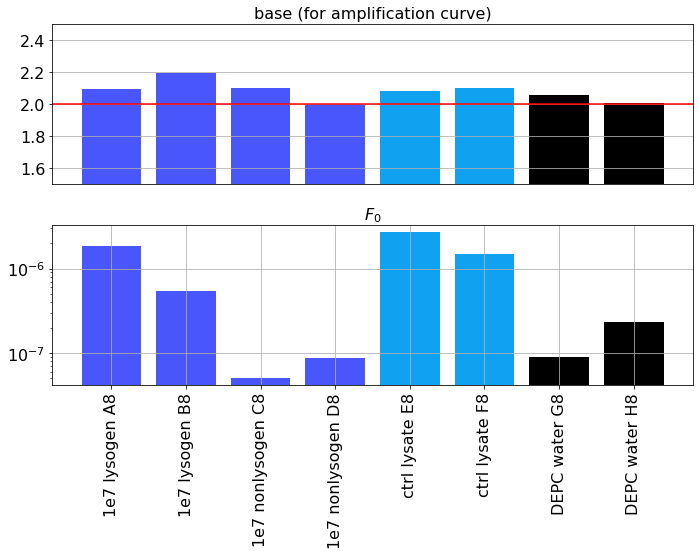

In [227]:
color = cm.rainbow(np.linspace(0, 1, 10))

fontSize=16
#matplotlib.rcParams.update({"axes.formatter.limits": (-4,4), "svg.fonttype" : "none", 'font.family':'MathJax_SansSerif', 'font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,'text.usetex':False,'text.latex.preamble':[r'\usepackage{sansmath}',r'\sansmath']})
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4), "svg.fonttype" : "none", 'pdf.fonttype':42,'font.family':'DejaVu Sans','font.sans-serif':'Helvetica','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,'text.usetex':False,'text.latex.preamble':[r'\usepackage{sansmath}',r'\sansmath']})
plotStyles={"markersize":8,"markeredgewidth":1.0,"linewidth":3.0}
stepStyles={"markersize":20,"markeredgewidth":3.0,"linewidth":3.0,"where":"post"}
barStyles={"width":0.65, "linewidth":0, "align":"center"}

plt.rcParams["figure.figsize"] = (10,8)

subplot(2,1,1)
k = 1; 
j = 0; name_arr = []; 
for i in base_dict.keys():
    tmp = i.split(" ")[0]; 
    if tmp in name_arr:
        j = j;
    else:
        name_arr.append(tmp);
        j = j+1;
    if "DEPC" in i:
        plt.bar(k,base_dict[i], color="black")
    else:
        plt.bar(k,base_dict[i], color=color[j])
    k = k+1;

plt.axhline(2,color='red')
plt.ylim((1.5,2.5))
#plt.legend(fontsize=12,ncol=6,framealpha=1)
plt.xticks([])
#plt.ylabel('base')
plt.grid(True)
plt.title('base (for amplification curve)')

subplot(2,1,2)
k = 1; 
j = 0; name_arr = []; 
for i in x0_dict.keys():
    tmp = i.split(" ")[0]; 
    if tmp in name_arr:
        j = j;
    else:
        name_arr.append(tmp);
        j = j+1;
    x0 = x0_dict[i]; 
    if "DEPC" in i:
        plt.bar(k,x0, color="black")
    else:
        plt.bar(k,x0, color=color[j])
    k = k+1;

plt.xticks(range(1,9),base_dict.keys(),rotation = 90 ); 
plt.yscale('log')
#plt.ylabel('base')
plt.grid(True)
plt.title(r'$F_0$')

plt.tight_layout()

In [228]:
master_base_dict["attP"] = base_dict;  
master_x0_dict["attP"] = x0_dict;

## genomic composition

### 1. attB/bioC

In [233]:
## bootstrap
def cal_sem_ratio(numerator,denominator,N):
    ratio_N = np.zeros(N); 
    for k in range(0,N):
        ratio_N[k] = 100*np.random.choice(numerator, 1)/np.random.choice(denominator, 1); 
    return (np.mean(ratio_N), np.std(ratio_N)) 

[5.67910837e-06 4.50421211e-06]
[2.00915924e-06 1.23734766e-05]
===
[4.30246895e-08 2.66624074e-08]
[0.00038211 0.00023555]
===


Text(0.5, 1.0, '#attB/#bioC')

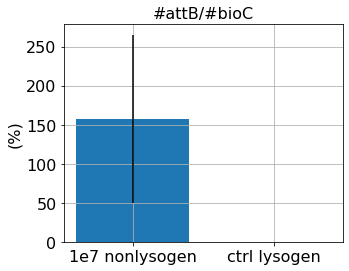

In [247]:
labels = ['1e7 nonlysogen','ctrl lysogen'];

plt.rcParams["figure.figsize"] = (5,4)
ratio = np.array([]); 
ratio_err = np.array([]); 
for j in labels:
    tmp_bioC = np.array([]);
    tmp_attB = np.array([]);
    for i in list(master_x0_dict["attB"].keys()):
        if j in i:
            tmp_attB = np.append(tmp_attB, master_x0_dict["attB"][i]);
            
    for i in list(master_x0_dict["bioC"].keys()):
        if j in i:
            tmp_bioC = np.append(tmp_bioC, master_x0_dict["bioC"][i]);
    print(tmp_attB)
    print(tmp_bioC)
    print('===')
    (mean_, sem_) = cal_sem_ratio(tmp_attB, tmp_bioC, 100); 
    ratio = np.append(ratio, mean_);
    ratio_err = np.append(ratio_err, sem_);

plt.bar(np.arange(1,3,1), ratio, yerr=ratio_err);
#plt.errorbar(np.arange(1,3,1), ratio, yerr=ratio_err, fmt='o-');
#plt.plot(np.array([7]), np.array([0]), 'o');
#plt.errorbar(np.array([1]), np.array([ratio[0]]), yerr=np.array([ratio_err[0]]), fmt='o-');
plt.xticks(range(1,3), labels,rotation=0)
plt.ylabel('(%)')
plt.grid(True)
#plt.yscale('log')
plt.title('#attB/#bioC')

[3.29177511e-05 1.64001139e-05]
[2.54528322e-06 3.83733624e-06]
===
[0.0002044  0.00037777]
[0.00038211 0.00023555]
===


Text(0.5, 1.0, '#attL/#bioC')

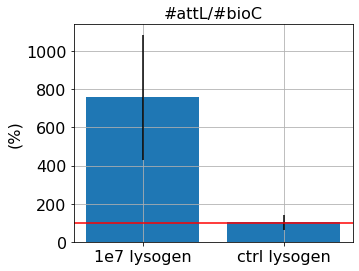

In [253]:
labels = ['1e7 lysogen','ctrl lysogen'];

plt.rcParams["figure.figsize"] = (5,4)
ratio = np.array([]); 
ratio_err = np.array([]); 
for j in labels:
    tmp_bioC = np.array([]);
    tmp_attB = np.array([]);
    for i in list(master_x0_dict["attL"].keys()):
        if j in i:
            tmp_attB = np.append(tmp_attB, master_x0_dict["attL"][i]);
            
    for i in list(master_x0_dict["bioC"].keys()):
        if j in i:
            tmp_bioC = np.append(tmp_bioC, master_x0_dict["bioC"][i]);
    print(tmp_attB)
    print(tmp_bioC)
    print('===')
    (mean_, sem_) = cal_sem_ratio(tmp_attB, tmp_bioC, 100); 
    ratio = np.append(ratio, mean_);
    ratio_err = np.append(ratio_err, sem_);

plt.bar(np.arange(1,3,1), ratio, yerr=ratio_err);
#plt.errorbar(np.arange(1,3,1), ratio, yerr=ratio_err, fmt='o-');
#plt.plot(np.array([7]), np.array([0]), 'o');
#plt.errorbar(np.array([1]), np.array([ratio[0]]), yerr=np.array([ratio_err[0]]), fmt='o-');
plt.xticks(range(1,3), labels,rotation=0)
plt.ylabel('(%)')
plt.grid(True)
plt.axhline(100,color='red')
plt.title('#attL/#bioC')

[2.54528322e-06 3.83733624e-06]
[2.54528322e-06 3.83733624e-06]
===
[2.00915924e-06 1.23734766e-05]
[2.00915924e-06 1.23734766e-05]
===
[0.00038211 0.00023555]
[0.00038211 0.00023555]
===


Text(0.5, 1.0, '#bioC/#bioC')

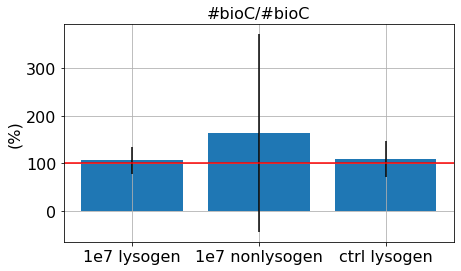

In [256]:
labels = ['1e7 lysogen','1e7 nonlysogen','ctrl lysogen'];

plt.rcParams["figure.figsize"] = (7,4)
ratio = np.array([]); 
ratio_err = np.array([]); 
for j in labels:
    tmp_bioC = np.array([]);
    tmp_attB = np.array([]);
    for i in list(master_x0_dict["bioC"].keys()):
        if j in i:
            tmp_attB = np.append(tmp_attB, master_x0_dict["bioC"][i]);
            
    for i in list(master_x0_dict["bioC"].keys()):
        if j in i:
            tmp_bioC = np.append(tmp_bioC, master_x0_dict["bioC"][i]);
    print(tmp_attB)
    print(tmp_bioC)
    print('===')
    (mean_, sem_) = cal_sem_ratio(tmp_attB, tmp_bioC, 100); 
    ratio = np.append(ratio, mean_);
    ratio_err = np.append(ratio_err, sem_);

plt.bar(np.arange(1,4,1), ratio, yerr=ratio_err);
#plt.errorbar(np.arange(1,3,1), ratio, yerr=ratio_err, fmt='o-');
#plt.plot(np.array([7]), np.array([0]), 'o');
#plt.errorbar(np.array([1]), np.array([ratio[0]]), yerr=np.array([ratio_err[0]]), fmt='o-');
plt.xticks(range(1,4), labels,rotation=0)
plt.ylabel('(%)')
plt.grid(True)
plt.axhline(100,color='red')
plt.title('#bioC/#bioC')

[7.49824733e-06 8.19675959e-06]
[2.54528322e-06 3.83733624e-06]
===
[0.00022702 0.00019744]
[0.00038211 0.00023555]
===


Text(0.5, 1.0, '#cI/#bioC')

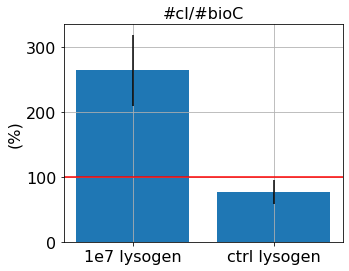

In [257]:
labels = ['1e7 lysogen','ctrl lysogen'];

plt.rcParams["figure.figsize"] = (5,4)
ratio = np.array([]); 
ratio_err = np.array([]); 
for j in labels:
    tmp_bioC = np.array([]);
    tmp_attB = np.array([]);
    for i in list(master_x0_dict["cI"].keys()):
        if j in i:
            tmp_attB = np.append(tmp_attB, master_x0_dict["cI"][i]);
            
    for i in list(master_x0_dict["bioC"].keys()):
        if j in i:
            tmp_bioC = np.append(tmp_bioC, master_x0_dict["bioC"][i]);
    print(tmp_attB)
    print(tmp_bioC)
    print('===')
    (mean_, sem_) = cal_sem_ratio(tmp_attB, tmp_bioC, 100); 
    ratio = np.append(ratio, mean_);
    ratio_err = np.append(ratio_err, sem_);

plt.bar(np.arange(1,3,1), ratio, yerr=ratio_err);
#plt.errorbar(np.arange(1,3,1), ratio, yerr=ratio_err, fmt='o-');
#plt.plot(np.array([7]), np.array([0]), 'o');
#plt.errorbar(np.array([1]), np.array([ratio[0]]), yerr=np.array([ratio_err[0]]), fmt='o-');
plt.xticks(range(1,3), labels,rotation=0)
plt.ylabel('(%)')
plt.grid(True)
plt.axhline(100,color='red')
plt.title('#cI/#bioC')

[1.87713105e-06 5.36101426e-07]
[2.54528322e-06 3.83733624e-06]
===
[5.03365714e-08 8.78925488e-08]
[2.00915924e-06 1.23734766e-05]
===


Text(0.5, 1.0, '#attP/#bioC')

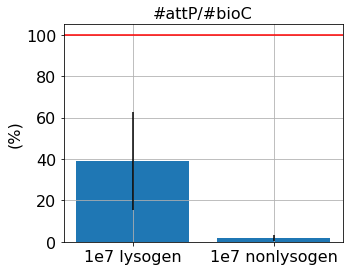

In [260]:
labels = ['1e7 lysogen','1e7 nonlysogen'];

plt.rcParams["figure.figsize"] = (5,4)
ratio = np.array([]); 
ratio_err = np.array([]); 
for j in labels:
    tmp_bioC = np.array([]);
    tmp_attB = np.array([]);
    for i in list(master_x0_dict["attP"].keys()):
        if j in i:
            tmp_attB = np.append(tmp_attB, master_x0_dict["attP"][i]);
            
    for i in list(master_x0_dict["bioC"].keys()):
        if j in i:
            tmp_bioC = np.append(tmp_bioC, master_x0_dict["bioC"][i]);
    print(tmp_attB)
    print(tmp_bioC)
    print('===')
    (mean_, sem_) = cal_sem_ratio(tmp_attB, tmp_bioC, 100); 
    ratio = np.append(ratio, mean_);
    ratio_err = np.append(ratio_err, sem_);

plt.bar(np.arange(1,3,1), ratio, yerr=ratio_err);
#plt.errorbar(np.arange(1,3,1), ratio, yerr=ratio_err, fmt='o-');
#plt.plot(np.array([7]), np.array([0]), 'o');
#plt.errorbar(np.array([1]), np.array([ratio[0]]), yerr=np.array([ratio_err[0]]), fmt='o-');
plt.xticks(range(1,3), labels,rotation=0)
plt.ylabel('(%)')
plt.grid(True)
plt.axhline(100,color='red')
plt.title('#attP/#bioC')

# Delta ct method

In [261]:
all_ct_dict = {}; 

In [268]:
ct_dict = {}; 

fig = go.Figure()
#['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for i in attB.keys():
    label_ = attB[i]; 
    neg = "ctrl lysogen";
    title_ = "attB"; 
    
    if "1e9" in label_:
        symbol = 'circle'; 
        color = '#1f77b4';
    elif "1e8" in label_:
        symbol = 'cross'; 
        color = '#ff7f0e';
    elif "1e7" in label_:
        symbol = 'diamond'; 
        color = '#2ca02c';
    elif "1e6" in label_:
        symbol = 'x';
        color = '#d62728';
    elif "1e5" in label_:
        symbol = 'square';
        color = '#9467bd';
    elif label_ == "ctrl lysogen":
        color = '#8c564b';
    elif label_ == "ctrl nonlysogen":
        color = '#e377c2';
    elif "DEPC" in label_:
        color = 'black'; 

    if label_ == neg:
        color = "grey"; 
    
    x = df.index.to_numpy();
    y=df[[i]].to_numpy()[:,0];
    
    if max(y)<100:
        fig.add_trace(go.Scatter(
        x=x,
        y=y,
        mode='markers+lines', # Style name/legend entry with html tags
        name=label_,
        marker_symbol=symbol,
        marker=dict(color=color, size=4),# override default to connect the gaps
        ))
        
    else:
        idx = np.where(y>500)[0][0]; 
        ct_dict[label_+" "+i] = x[idx]-(y[idx]-500)/(y[idx]-y[idx-1]); 
        
        fig.add_trace(go.Scatter(
        x=x,
        y=y,
        mode='markers+lines', # Style name/legend entry with html tags
        name=label_,
        marker_symbol=symbol,
        marker=dict(color=color, size=4),# override default to connect the gaps
        ))
        
fig.add_hline(y=500,line_width=3, line_color="green")

fig.update_layout(xaxis_title='Cycle (#)',\
                  yaxis_title='Fluorescence (A.U.)',\
                  updatemenus=[dict(\
                       buttons=[\
                                dict(label="Linear",  method="relayout", args=[{"yaxis.type": "linear"}]),\
                                dict(label="Log", method="relayout", args=[{"yaxis.type": "log"}]),\
                               ])])
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)
fig.update_layout(title_text=title_, title_x=0.5)
fig.layout.font.family = 'Arial'; fig.layout.font.size = 14

fig.show()
fig.write_html(folder+'/11_delta_ct_attB.html')

Assume the DNA concentration at t=0 is $x_0$, and the amplification efficiency is $b$. At $C_t$ cycle, the DNA concentration will reach $y_t$. 

$y_t = x_0 \cdot b^{C_t} \implies \ln(y_t) = \ln(x_0) + C_t \cdot \ln(b) \implies C_t = \frac{1}{\ln(b)}\cdot (\ln(y_t) - \ln(x_0))$

Fit a linear line for x = $\ln(x_0)$, y = $C_t$. The slope will be $k = -\frac{1}{\ln(b)}$

$k = -\frac{1}{\ln(b)} \implies -k = \frac{1}{\ln(b)} \implies  -\frac{1}{k} = \ln(b) \implies b = \exp(-\frac{1}{k})$

In [269]:
all_ct_dict["attB"] = ct_dict;

-1.633417121810128
1.8445096908871443


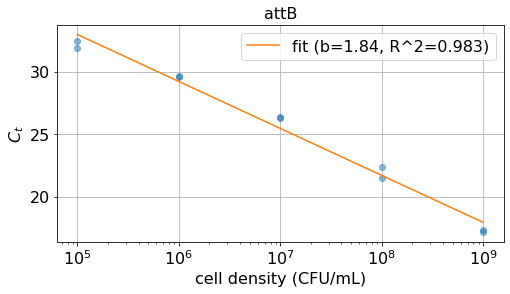

In [270]:
x_ = np.array([])
y_ = np.array([]);
for i in ['1e9', '1e8', '1e7', '1e6', '1e5']:
    tmp = np.array([]); 
    for j in ct_dict.keys():
        if i in j:
            x_ = np.append(x_, float(i))
            y_ = np.append(y_, ct_dict[j]);
            

slope, intercept, r_value, _, _ = linregress(np.log(x_), y_);    
print(slope)
print(np.exp(-1/slope))
    
    
plt.rcParams["figure.figsize"] = (8,4)
plt.plot(x_, y_, 'o', alpha=0.5)
plt.plot(x_, intercept+slope*np.log(x_), label='fit (b='+str(np.exp(-1/slope))[:4]+', R^2='+str(r_value**2)[:5]+')')
plt.xlabel('cell density (CFU/mL)');plt.ylabel(r'$C_t$')
plt.legend()
plt.xscale('log'); #plt.yscale('log')
plt.title('attB')
plt.grid(True)

In [271]:
ct_dict = {}; 

fig = go.Figure()
#['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for i in attL.keys():
    label_ = attL[i]; 
    neg = "ctrl lysogen";
    title_ = "attL"; 
    
    if "1e9" in label_:
        symbol = 'circle'; 
        color = '#1f77b4';
    elif "1e8" in label_:
        symbol = 'cross'; 
        color = '#ff7f0e';
    elif "1e7" in label_:
        symbol = 'diamond'; 
        color = '#2ca02c';
    elif "1e6" in label_:
        symbol = 'x';
        color = '#d62728';
    elif "1e5" in label_:
        symbol = 'square';
        color = '#9467bd';
    elif label_ == "ctrl lysogen":
        color = '#8c564b';
    elif label_ == "ctrl nonlysogen":
        color = '#e377c2';
    elif "DEPC" in label_:
        color = 'black'; 

    if label_ == neg:
        color = "grey"; 
    
    x = df.index.to_numpy();
    y=df[[i]].to_numpy()[:,0];
    
    if max(y)<100:
        fig.add_trace(go.Scatter(
        x=x,
        y=y,
        mode='markers+lines', # Style name/legend entry with html tags
        name=label_,
        marker_symbol=symbol,
        marker=dict(color=color, size=4),# override default to connect the gaps
        ))
        
    else:
        idx = np.where(y>500)[0][0]; 
        ct_dict[label_+" "+i] = x[idx]-(y[idx]-500)/(y[idx]-y[idx-1]); 
        
        fig.add_trace(go.Scatter(
        x=x,
        y=y,
        mode='markers+lines', # Style name/legend entry with html tags
        name=label_,
        marker_symbol=symbol,
        marker=dict(color=color, size=4),# override default to connect the gaps
        ))
        
fig.add_hline(y=500,line_width=3, line_color="green")

fig.update_layout(xaxis_title='Cycle (#)',\
                  yaxis_title='Fluorescence (A.U.)',\
                  updatemenus=[dict(\
                       buttons=[\
                                dict(label="Linear",  method="relayout", args=[{"yaxis.type": "linear"}]),\
                                dict(label="Log", method="relayout", args=[{"yaxis.type": "log"}]),\
                               ])])
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)
fig.update_layout(title_text=title_, title_x=0.5)
fig.layout.font.family = 'Arial'; fig.layout.font.size = 14

fig.show()
fig.write_html(folder+'/12_delta_ct_attL.html')

In [272]:
all_ct_dict["attL"] = ct_dict;

-1.7801893704311416
1.7537177983923844


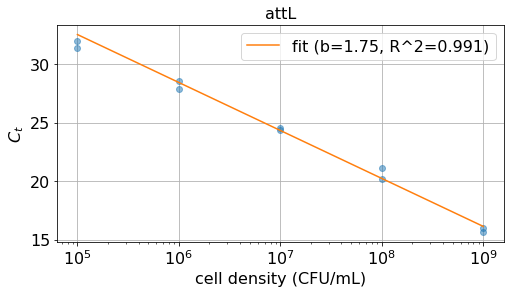

In [273]:
x_ = np.array([])
y_ = np.array([]);
for i in ['1e9', '1e8', '1e7', '1e6', '1e5']:
    tmp = np.array([]); 
    for j in ct_dict.keys():
        if i in j:
            x_ = np.append(x_, float(i))
            y_ = np.append(y_, ct_dict[j]);
            

slope, intercept, r_value, _, _ = linregress(np.log(x_[:-2]), y_[:-2]);    
print(slope)
print(np.exp(-1/slope))
    
    
plt.rcParams["figure.figsize"] = (8,4)
plt.plot(x_, y_, 'o', alpha=0.5)
plt.plot(x_, intercept+slope*np.log(x_), label='fit (b='+str(np.exp(-1/slope))[:4]+', R^2='+str(r_value**2)[:5]+')')
plt.xlabel('cell density (CFU/mL)');plt.ylabel(r'$C_t$')
plt.legend()
plt.xscale('log'); #plt.yscale('log')
plt.title('attL')
plt.grid(True)

In [274]:
ct_dict = {}; 

fig = go.Figure()
#['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for i in cI.keys():
    label_ = cI[i]; 
    neg = "ctrl lysogen";
    title_ = "cI"; 
    
    if "1e9" in label_:
        symbol = 'circle'; 
        color = '#1f77b4';
    elif "1e8" in label_:
        symbol = 'cross'; 
        color = '#ff7f0e';
    elif "1e7" in label_:
        symbol = 'diamond'; 
        color = '#2ca02c';
    elif "1e6" in label_:
        symbol = 'x';
        color = '#d62728';
    elif "1e5" in label_:
        symbol = 'square';
        color = '#9467bd';
    elif label_ == "ctrl lysogen":
        color = '#8c564b';
    elif label_ == "ctrl nonlysogen":
        color = '#e377c2';
    elif "DEPC" in label_:
        color = 'black'; 

    if label_ == neg:
        color = "grey"; 
    
    x = df.index.to_numpy();
    y=df[[i]].to_numpy()[:,0];
    
    if max(y)<100:
        fig.add_trace(go.Scatter(
        x=x,
        y=y,
        mode='markers+lines', # Style name/legend entry with html tags
        name=label_,
        marker_symbol=symbol,
        marker=dict(color=color, size=4),# override default to connect the gaps
        ))
        
    else:
        idx = np.where(y>500)[0][0]; 
        ct_dict[label_+" "+i] = x[idx]-(y[idx]-500)/(y[idx]-y[idx-1]); 
        
        fig.add_trace(go.Scatter(
        x=x,
        y=y,
        mode='markers+lines', # Style name/legend entry with html tags
        name=label_,
        marker_symbol=symbol,
        marker=dict(color=color, size=4),# override default to connect the gaps
        ))
        
fig.add_hline(y=500,line_width=3, line_color="green")

fig.update_layout(xaxis_title='Cycle (#)',\
                  yaxis_title='Fluorescence (A.U.)',\
                  updatemenus=[dict(\
                       buttons=[\
                                dict(label="Linear",  method="relayout", args=[{"yaxis.type": "linear"}]),\
                                dict(label="Log", method="relayout", args=[{"yaxis.type": "log"}]),\
                               ])])
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)
fig.update_layout(title_text=title_, title_x=0.5)
fig.layout.font.family = 'Arial'; fig.layout.font.size = 14

fig.show()
fig.write_html(folder+'/13_delta_ct_cI.html')

In [275]:
all_ct_dict["cI"] = ct_dict;

-1.72730697195195
1.7841389011485491


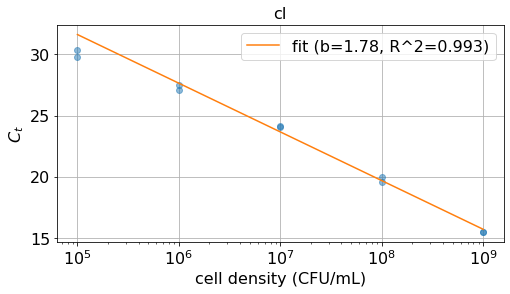

In [276]:
x_ = np.array([])
y_ = np.array([]);
for i in ['1e9', '1e8', '1e7', '1e6', '1e5']:
    tmp = np.array([]); 
    for j in ct_dict.keys():
        if i in j:
            x_ = np.append(x_, float(i))
            y_ = np.append(y_, ct_dict[j]);
            

slope, intercept, r_value, _, _ = linregress(np.log(x_[:-2]), y_[:-2]);    
print(slope)
print(np.exp(-1/slope))
    
    
plt.rcParams["figure.figsize"] = (8,4)
plt.plot(x_, y_, 'o', alpha=0.5)
plt.plot(x_, intercept+slope*np.log(x_), label='fit (b='+str(np.exp(-1/slope))[:4]+', R^2='+str(r_value**2)[:5]+')')
plt.xlabel('cell density (CFU/mL)');plt.ylabel(r'$C_t$')
plt.legend()
plt.xscale('log'); #plt.yscale('log')
plt.title('cI')
plt.grid(True)

In [277]:
ct_dict = {}; 

fig = go.Figure()
#['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for i in bioC.keys():
    label_ = bioC[i]; 
    neg = "ctrl lysogen";
    title_ = "bioC"; 
    
    if "1e9" in label_:
        symbol = 'circle'; 
        color = '#1f77b4';
    elif "1e8" in label_:
        symbol = 'cross'; 
        color = '#ff7f0e';
    elif "1e7" in label_:
        symbol = 'diamond'; 
        color = '#2ca02c';
    elif "1e6" in label_:
        symbol = 'x';
        color = '#d62728';
    elif "1e5" in label_:
        symbol = 'square';
        color = '#9467bd';
    elif label_ == "ctrl lysogen":
        color = '#8c564b';
    elif label_ == "ctrl nonlysogen":
        color = '#e377c2';
    elif "DEPC" in label_:
        color = 'black'; 

    if label_ == neg:
        color = "grey"; 
    
    x = df.index.to_numpy();
    y=df[[i]].to_numpy()[:,0];
    
    if max(y)<100:
        fig.add_trace(go.Scatter(
        x=x,
        y=y,
        mode='markers+lines', # Style name/legend entry with html tags
        name=label_,
        marker_symbol=symbol,
        marker=dict(color=color, size=4),# override default to connect the gaps
        ))
        
    else:
        idx = np.where(y>500)[0][0]; 
        ct_dict[label_+" "+i] = x[idx]-(y[idx]-500)/(y[idx]-y[idx-1]); 
        
        fig.add_trace(go.Scatter(
        x=x,
        y=y,
        mode='markers+lines', # Style name/legend entry with html tags
        name=label_,
        marker_symbol=symbol,
        marker=dict(color=color, size=4),# override default to connect the gaps
        ))
        
fig.add_hline(y=500,line_width=3, line_color="green")

fig.update_layout(xaxis_title='Cycle (#)',\
                  yaxis_title='Fluorescence (A.U.)',\
                  updatemenus=[dict(\
                       buttons=[\
                                dict(label="Linear",  method="relayout", args=[{"yaxis.type": "linear"}]),\
                                dict(label="Log", method="relayout", args=[{"yaxis.type": "log"}]),\
                               ])])
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)
fig.update_layout(title_text=title_, title_x=0.5)
fig.layout.font.family = 'Arial'; fig.layout.font.size = 14

fig.show()
fig.write_html(folder+'/14_delta_ct_bioC.html')

In [278]:
all_ct_dict["bioC"] = ct_dict;

In [279]:
ct_dict = {}; 

fig = go.Figure()
#['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for i in attP.keys():
    label_ = attP[i]; 
    neg = "ctrl lysogen";
    title_ = "attP"; 
    
    if "1e7 lysogen" in label_:
        symbol = 'circle'; 
        color = '#1f77b4';
    elif "1e7 nonlysogen" in label_:
        symbol = 'cross'; 
        color = '#ff7f0e';
    elif "lysate" in label_:
        symbol = 'diamond'; 
        color = '#2ca02c';
    elif label_ == "ctrl lysogen":
        color = '#8c564b';
    elif label_ == "ctrl nonlysogen":
        color = '#e377c2';
    elif "DEPC" in label_:
        color = 'black'; 

    if label_ == neg:
        color = "grey"; 
    
    x = df.index.to_numpy();
    y=df[[i]].to_numpy()[:,0];
    
    if max(y)<100:
        fig.add_trace(go.Scatter(
        x=x,
        y=y,
        mode='markers+lines', # Style name/legend entry with html tags
        name=label_,
        marker_symbol=symbol,
        marker=dict(color=color, size=4),# override default to connect the gaps
        ))
        
    else:
        idx = np.where(y>500)[0][0]; 
        ct_dict[label_+" "+i] = x[idx]-(y[idx]-500)/(y[idx]-y[idx-1]); 
        
        fig.add_trace(go.Scatter(
        x=x,
        y=y,
        mode='markers+lines', # Style name/legend entry with html tags
        name=label_,
        marker_symbol=symbol,
        marker=dict(color=color, size=4),# override default to connect the gaps
        ))
        
fig.add_hline(y=500,line_width=3, line_color="green")

fig.update_layout(xaxis_title='Cycle (#)',\
                  yaxis_title='Fluorescence (A.U.)',\
                  updatemenus=[dict(\
                       buttons=[\
                                dict(label="Linear",  method="relayout", args=[{"yaxis.type": "linear"}]),\
                                dict(label="Log", method="relayout", args=[{"yaxis.type": "log"}]),\
                               ])])
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)
fig.update_layout(title_text=title_, title_x=0.5)
fig.layout.font.family = 'Arial'; fig.layout.font.size = 14

fig.show()
fig.write_html(folder+'/15_delta_ct_attP.html')

In [280]:
all_ct_dict["attP"] = ct_dict;

In [281]:
all_ct_dict

{'attB': {'1e9 nonlysogen A1': 17.141653964482877,
  '1e9 nonlysogen B1': 17.28583259761049,
  '1e8 nonlysogen C1': 21.4815836431303,
  '1e8 nonlysogen D1': 22.355530500443145,
  '1e7 nonlysogen E1': 26.362191875744145,
  '1e7 nonlysogen F1': 26.324554777437747,
  '1e6 nonlysogen G1': 29.654406893784117,
  '1e6 nonlysogen H1': 29.553823889499547,
  '1e5 nonlysogen A2': 31.892088080351677,
  '1e5 nonlysogen B2': 32.46065931509898,
  'ctrl nonlysogen C2': 16.646803554104434,
  'ctrl nonlysogen D2': 17.130012197389323,
  'ctrl lysogen E2': 34.84574057221966,
  'ctrl lysogen F2': 34.1865742359887,
  'DEPC water H2': 34.290263603163964},
 'attL': {'1e9 lysogen A3': 15.626183049543231,
  '1e9 lysogen B3': 15.977766506357321,
  '1e8 lysogen C3': 20.172750666638247,
  '1e8 lysogen D3': 21.111977031454824,
  '1e7 lysogen E3': 24.34775575701843,
  '1e7 lysogen F3': 24.53573784438493,
  '1e6 lysogen G3': 27.831760692524615,
  '1e6 lysogen H3': 28.566183609347192,
  '1e5 lysogen A4': 31.3468622952

In [295]:
b = 1.8; 
def cal_sem_ratio_v2(ct1,ct2,N):
    ratio_N = np.zeros(N); 
    for k in range(0,N):
        ratio_N[k] = np.power(b, np.random.choice(ct2, 1)-np.random.choice(ct1, 1))*100; 
    return (np.mean(ratio_N), np.std(ratio_N)) 

In [296]:
all_ct_dict["attB"]['1e7 nonlysogen E1']

26.362191875744145

In [297]:
all_ct_dict["bioC"]['1e7 nonlysogen C7']

24.974648110133938

[26.36219188 26.32455478]
[24.97464811 25.08828056]
===
[34.84574057 34.18657424]
[18.22795082 18.79105637]
===


Text(0.5, 1.0, '#attB/#bioC')

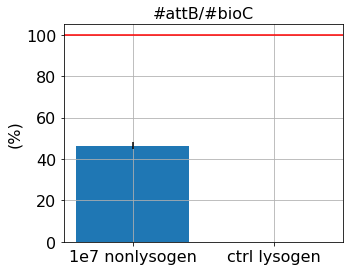

In [304]:
labels = ['1e7 nonlysogen','ctrl lysogen'];

plt.rcParams["figure.figsize"] = (5,4)
ratio = np.array([]); 
ratio_err = np.array([]); 
for j in labels:
    tmp_bioC = np.array([]);
    tmp_attB = np.array([]);
    for i in list(all_ct_dict["attB"].keys()):
        if j in i:
            tmp_attB = np.append(tmp_attB, all_ct_dict["attB"][i]);
            
    for i in list(all_ct_dict["bioC"].keys()):
        if j in i:
            tmp_bioC = np.append(tmp_bioC, all_ct_dict["bioC"][i]);
    print(tmp_attB)
    print(tmp_bioC)
    print('===')
    (mean_, sem_) = cal_sem_ratio_v2(tmp_attB, tmp_bioC, 100); 
    ratio = np.append(ratio, mean_);
    ratio_err = np.append(ratio_err, sem_);

plt.bar(np.arange(1,3,1), ratio, yerr=ratio_err);
#plt.errorbar(np.arange(1,3,1), ratio, yerr=ratio_err, fmt='o-');
#plt.plot(np.array([7]), np.array([0]), 'o');
#plt.errorbar(np.array([1]), np.array([ratio[0]]), yerr=np.array([ratio_err[0]]), fmt='o-');
plt.xticks(range(1,3), labels,rotation=0)
plt.ylabel('(%)')
plt.grid(True)
plt.axhline(100, color='red')
plt.title('#attB/#bioC')

[24.34775576 24.53573784]
[25.12464481 25.18222991]
===
[18.70833939 19.0828802 ]
[18.22795082 18.79105637]
===


Text(0.5, 1.0, '#attL/#bioC')

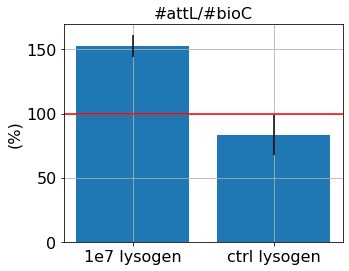

In [303]:
labels = ['1e7 lysogen','ctrl lysogen'];

plt.rcParams["figure.figsize"] = (5,4)
ratio = np.array([]); 
ratio_err = np.array([]); 
for j in labels:
    tmp_bioC = np.array([]);
    tmp_attB = np.array([]);
    for i in list(all_ct_dict["attL"].keys()):
        if j in i:
            tmp_attB = np.append(tmp_attB, all_ct_dict["attL"][i]);
            
    for i in list(all_ct_dict["bioC"].keys()):
        if j in i:
            tmp_bioC = np.append(tmp_bioC, all_ct_dict["bioC"][i]);
    print(tmp_attB)
    print(tmp_bioC)
    print('===')
    (mean_, sem_) = cal_sem_ratio_v2(tmp_attB, tmp_bioC, 100); 
    ratio = np.append(ratio, mean_);
    ratio_err = np.append(ratio_err, sem_);

plt.bar(np.arange(1,3,1), ratio, yerr=ratio_err);
#plt.errorbar(np.arange(1,3,1), ratio, yerr=ratio_err, fmt='o-');
#plt.plot(np.array([7]), np.array([0]), 'o');
#plt.errorbar(np.array([1]), np.array([ratio[0]]), yerr=np.array([ratio_err[0]]), fmt='o-');
plt.xticks(range(1,3), labels,rotation=0)
plt.ylabel('(%)')
plt.grid(True)
plt.axhline(100, color='red')
plt.title('#attL/#bioC')

[25.12464481 25.18222991]
[25.12464481 25.18222991]
===
[24.97464811 25.08828056]
[24.97464811 25.08828056]
===
[18.22795082 18.79105637]
[18.22795082 18.79105637]
===


Text(0.5, 1.0, '#bioC/#bioC')

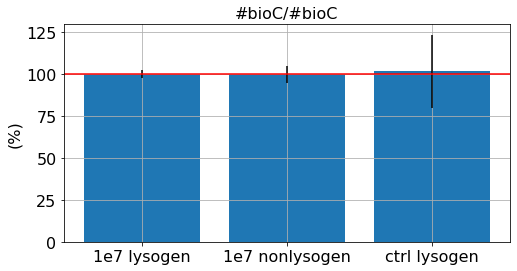

In [305]:
labels = ['1e7 lysogen','1e7 nonlysogen','ctrl lysogen'];

plt.rcParams["figure.figsize"] = (8,4)
ratio = np.array([]); 
ratio_err = np.array([]); 
for j in labels:
    tmp_bioC = np.array([]);
    tmp_attB = np.array([]);
    for i in list(all_ct_dict["bioC"].keys()):
        if j in i:
            tmp_attB = np.append(tmp_attB, all_ct_dict["bioC"][i]);
            
    for i in list(all_ct_dict["bioC"].keys()):
        if j in i:
            tmp_bioC = np.append(tmp_bioC, all_ct_dict["bioC"][i]);
    print(tmp_attB)
    print(tmp_bioC)
    print('===')
    (mean_, sem_) = cal_sem_ratio_v2(tmp_attB, tmp_bioC, 100); 
    ratio = np.append(ratio, mean_);
    ratio_err = np.append(ratio_err, sem_);

plt.bar(np.arange(1,4,1), ratio, yerr=ratio_err);
#plt.errorbar(np.arange(1,3,1), ratio, yerr=ratio_err, fmt='o-');
#plt.plot(np.array([7]), np.array([0]), 'o');
#plt.errorbar(np.array([1]), np.array([ratio[0]]), yerr=np.array([ratio_err[0]]), fmt='o-');
plt.xticks(range(1,4), labels,rotation=0)
plt.ylabel('(%)')
plt.grid(True)
plt.axhline(100, color='red')
plt.title('#bioC/#bioC')

[24.17542617 24.06281422]
[25.12464481 25.18222991]
===
[18.65108801 19.04074563]
[18.22795082 18.79105637]
===


Text(0.5, 1.0, '#cI/#bioC')

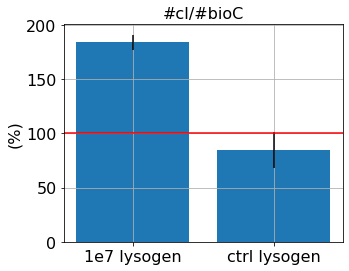

In [306]:
labels = ['1e7 lysogen','ctrl lysogen'];

plt.rcParams["figure.figsize"] = (5,4)
ratio = np.array([]); 
ratio_err = np.array([]); 
for j in labels:
    tmp_bioC = np.array([]);
    tmp_attB = np.array([]);
    for i in list(all_ct_dict["cI"].keys()):
        if j in i:
            tmp_attB = np.append(tmp_attB, all_ct_dict["cI"][i]);
            
    for i in list(all_ct_dict["bioC"].keys()):
        if j in i:
            tmp_bioC = np.append(tmp_bioC, all_ct_dict["bioC"][i]);
    print(tmp_attB)
    print(tmp_bioC)
    print('===')
    (mean_, sem_) = cal_sem_ratio_v2(tmp_attB, tmp_bioC, 100); 
    ratio = np.append(ratio, mean_);
    ratio_err = np.append(ratio_err, sem_);

plt.bar(np.arange(1,3,1), ratio, yerr=ratio_err);
#plt.errorbar(np.arange(1,3,1), ratio, yerr=ratio_err, fmt='o-');
#plt.plot(np.array([7]), np.array([0]), 'o');
#plt.errorbar(np.array([1]), np.array([ratio[0]]), yerr=np.array([ratio_err[0]]), fmt='o-');
plt.xticks(range(1,3), labels,rotation=0)
plt.ylabel('(%)')
plt.grid(True)
plt.axhline(100, color='red')
plt.title('#cI/#bioC')

[26.19851492 26.17577833]
[25.12464481 25.18222991]
===
[30.97512466 32.32389424]
[24.97464811 25.08828056]
===


Text(0.5, 1.0, '#attP/#bioC')

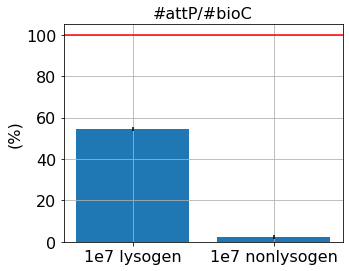

In [309]:
labels = ['1e7 lysogen','1e7 nonlysogen'];

plt.rcParams["figure.figsize"] = (5,4)
ratio = np.array([]); 
ratio_err = np.array([]); 
for j in labels:
    tmp_bioC = np.array([]);
    tmp_attB = np.array([]);
    for i in list(all_ct_dict["attP"].keys()):
        if j in i:
            tmp_attB = np.append(tmp_attB, all_ct_dict["attP"][i]);
            
    for i in list(all_ct_dict["bioC"].keys()):
        if j in i:
            tmp_bioC = np.append(tmp_bioC, all_ct_dict["bioC"][i]);
    print(tmp_attB)
    print(tmp_bioC)
    print('===')
    (mean_, sem_) = cal_sem_ratio_v2(tmp_attB, tmp_bioC, 100); 
    ratio = np.append(ratio, mean_);
    ratio_err = np.append(ratio_err, sem_);

plt.bar(np.arange(1,3,1), ratio, yerr=ratio_err);
#plt.errorbar(np.arange(1,3,1), ratio, yerr=ratio_err, fmt='o-');
#plt.plot(np.array([7]), np.array([0]), 'o');
#plt.errorbar(np.array([1]), np.array([ratio[0]]), yerr=np.array([ratio_err[0]]), fmt='o-');
plt.xticks(range(1,3), labels,rotation=0)
plt.ylabel('(%)')
plt.grid(True)
plt.axhline(100, color='red')
plt.title('#attP/#bioC')

In [ ]:
labels = ['1e7 lysogen','1e7 nonlysogen'];

plt.rcParams["figure.figsize"] = (5,4)
ratio = np.array([]); 
ratio_err = np.array([]); 
for j in labels:
    tmp_bioC = np.array([]);
    tmp_attB = np.array([]);
    for i in list(all_ct_dict["attP"].keys()):
        if j in i:
            tmp_attB = np.append(tmp_attB, all_ct_dict["attP"][i]);
            
    for i in list(all_ct_dict["bioC"].keys()):
        if j in i:
            tmp_bioC = np.append(tmp_bioC, all_ct_dict["bioC"][i]);
    print(tmp_attB)
    print(tmp_bioC)
    print('===')
    (mean_, sem_) = cal_sem_ratio_v2(tmp_attB, tmp_bioC, 100); 
    ratio = np.append(ratio, mean_);
    ratio_err = np.append(ratio_err, sem_);

plt.bar(np.arange(1,3,1), ratio, yerr=ratio_err);
#plt.errorbar(np.arange(1,3,1), ratio, yerr=ratio_err, fmt='o-');
#plt.plot(np.array([7]), np.array([0]), 'o');
#plt.errorbar(np.array([1]), np.array([ratio[0]]), yerr=np.array([ratio_err[0]]), fmt='o-');
plt.xticks(range(1,3), labels,rotation=0)
plt.ylabel('(%)')
plt.grid(True)
plt.axhline(100, color='red')
plt.title('#attP/#bioC')

In [321]:
ct_dict = {}; 

fig = go.Figure()
#['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for i in ['1e7 nonlysogen E1', '1e7 nonlysogen F1', '1e7 nonlysogen C7', '1e7 nonlysogen D7']: 
    x = df.index.to_numpy();
    jj = i.split(" ")[-1]; 
    y=df[[jj]].to_numpy()[:,0];
    if 'E1' in i or 'F1' in i:
        label_ = 'attB 1e7 nonlysogen';
        color = '#1f77b4';
    else:
        label_ = 'bioC 1e7 nonlysogen'
        color = '#ff7f0e'; 
    fig.add_trace(go.Scatter(
        x=x,
        y=y,
        mode='markers+lines', # Style name/legend entry with html tags
        name=label_,
        marker=dict(color=color, size=4),# override default to connect the gaps
    ))
        
fig.add_hline(y=500,line_width=3, line_color="green")

fig.update_layout(xaxis_title='Cycle (#)',\
                  yaxis_title='Fluorescence (A.U.)',\
                  updatemenus=[dict(\
                       buttons=[\
                                dict(label="Linear",  method="relayout", args=[{"yaxis.type": "linear"}]),\
                                dict(label="Log", method="relayout", args=[{"yaxis.type": "log"}]),\
                               ])])
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)
#fig.update_layout(title_text=title_, title_x=0.5)
fig.layout.font.family = 'Arial'; fig.layout.font.size = 14

fig.show()
#fig.write_html(folder+'/14_delta_ct_bioC.html')

In [322]:
fig = go.Figure()
#['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for i in ['1e7 lysogen E3', '1e7 lysogen F3', '1e7 lysogen A7', '1e7 lysogen B7',\
         'ctrl lysogen C4', 'ctrl lysogen D4', 'ctrl lysogen E7','ctrl lysogen F7']: 
    x = df.index.to_numpy();
    jj = i.split(" ")[-1]; 
    y=df[[jj]].to_numpy()[:,0];
    if 'E3' in i or 'F3' in i:
        label_ = 'attL 1e7 lysogen';
        color = '#1f77b4';
    elif 'A7' in i or 'B7' in i:
        label_ = 'bioC 1e7 lysogen'
        color = '#ff7f0e'; 
    elif 'C4' in i or 'D4' in i:
        label_ = 'attL ctrl lysogen'
        color = '#2ca02c'; 
    elif 'E7' in i or 'F7' in i:
        label_ = 'bioC ctrl lysogen'
        color = '#d62728'; 
    
    fig.add_trace(go.Scatter(
        x=x,
        y=y,
        mode='markers+lines', # Style name/legend entry with html tags
        name=label_,
        marker=dict(color=color, size=4),# override default to connect the gaps
    ))
        
fig.add_hline(y=500,line_width=3, line_color="green")

fig.update_layout(xaxis_title='Cycle (#)',\
                  yaxis_title='Fluorescence (A.U.)',\
                  updatemenus=[dict(\
                       buttons=[\
                                dict(label="Linear",  method="relayout", args=[{"yaxis.type": "linear"}]),\
                                dict(label="Log", method="relayout", args=[{"yaxis.type": "log"}]),\
                               ])])
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)
#fig.update_layout(title_text=title_, title_x=0.5)
fig.layout.font.family = 'Arial'; fig.layout.font.size = 14

fig.show()
#fig.write_html(folder+'/14_delta_ct_bioC.html')